# Techniques to highlight Melanin spots in training data

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os, re


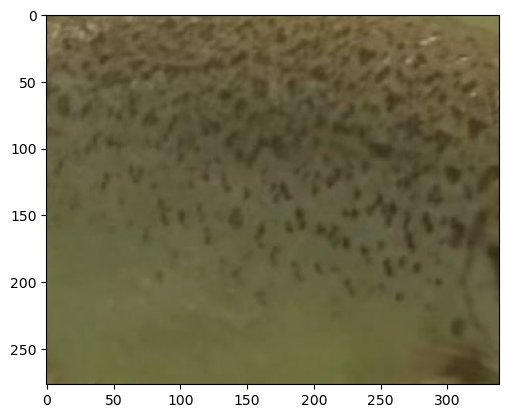

In [12]:
image_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Identifikasjonssett/fish9/thorax/fish9_thorax_GP020101_00005879.jpg"

img_bgr = cv2.imread(image_path)
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img)

plt.show()

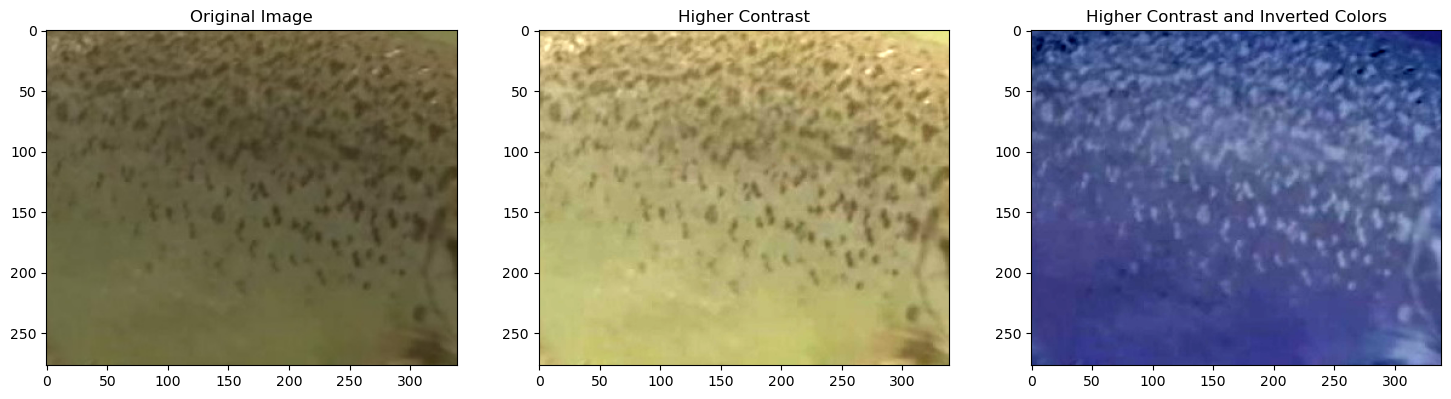

In [19]:
# Increase contrast

matrix1 = np.ones(img.shape) * 1.8

img_highercont = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix1), 0, 255))

plt.figure(figsize=[18,5])
plt.subplot(131)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(132)
plt.imshow(img_highercont)
plt.title("Higher Contrast")
plt.subplot(133)
plt.imshow(255-img_highercont)
plt.title("Higher Contrast and Inverted Colors")

plt.show()

# Make training set with Higher Contrast and Inverted Colors

In [34]:
data_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Identifikasjonssett/"

to_path = "/Users/magnuswiik/prosjektoppgave_data/Masteroppgave_data/Identifikasjonssett_AP2/"

landmark = "thorax"

images = []

for fish in os.listdir(data_path):
    if not fish.startswith('.'):
        for folder in os.listdir(os.path.join(data_path, fish)):
            if (not folder.startswith('.')) and folder == landmark:
                for file in sorted(os.listdir(os.path.join(data_path, fish, folder))):
                    if file.endswith(('.jpg', '.jpeg', '.png')):
                        img_bgr = cv2.imread(image_path)
                        #img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
                        matrix1 = np.ones(img.shape) * 1.8
                        img_hc = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix1), 0, 255))
                        img_hci = 255 - img_hc
                        dest = os.path.join(to_path, fish, folder)
                        if not os.path.isdir(dest):
                            os.makedirs(dest)
                        cv2.imwrite(dest + "/" + file, img_hci)


# Integrated Gradients

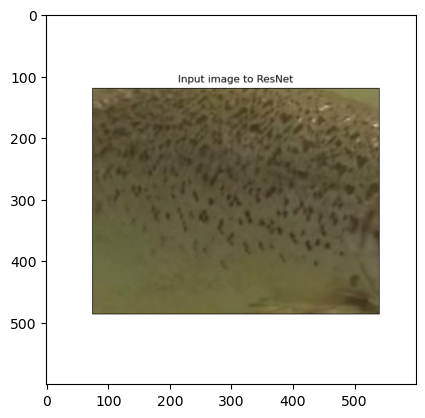

In [4]:
import cv2
import matplotlib.pyplot as plt

img1_path = "/Users/magnuswiik/Documents/masteroppgave figurer/model_interpretability/Figure_1.png"
img2_path = "/Users/magnuswiik/Documents/masteroppgave figurer/model_interpretability/thorax_IG_trained.png"

img_bgr = cv2.imread(img1_path)
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img)

plt.show()